# Logistic Regression

### Data preperations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.style.use("seaborn")

In [3]:
# mean and covariance of label 1
mean_1 = np.array([1,0.5])
cov_1 = np.array([[1,0.1],[0.1,1.2]])
# mean and covariance of label 2
mean_2 = np.array([4,5])
cov_2 = np.array([[1.21,0.1],[0.1,1.3]])

In [4]:
# creating the distribution
dist_01 = np.random.multivariate_normal(mean_1,cov_1,1000)
dist_02 = np.random.multivariate_normal(mean_2,cov_2,1000)

In [5]:
print(dist_01.shape)
print(dist_02.shape)

(1000, 2)
(1000, 2)


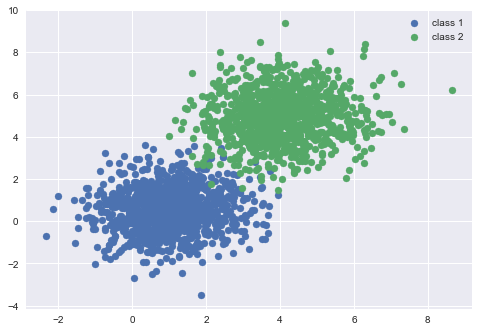

In [6]:
plt.scatter(dist_01[:,0],dist_01[:,1],label="class 1")
plt.scatter(dist_02[:,0],dist_02[:,1],label="class 2")
plt.legend()
plt.show()

In [7]:
from sklearn.datasets import make_blobs

In [8]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=4)

In [9]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


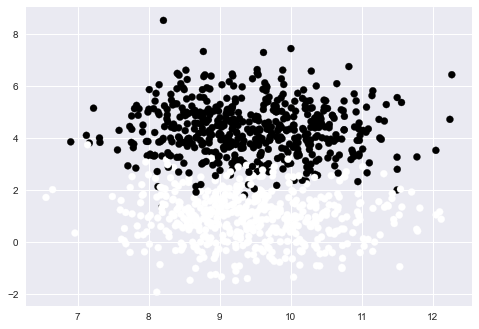

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [18]:
X = np.hstack((np.ones((X.shape[0],1)),X))

# Logistic regression functions

In [19]:
# DO NOT EDIT ANY VARIABLE OR FUNCTION NAME(S) IN THIS CELL
# Let's try more object oriented approach this time :)
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        '''Initialize variables
        Args:
            learning_rate  : Learning Rate
            max_iterations : Max iterations for training weights
        '''
        # Initialising all the parameters
        self.learning_rate  = learning_rate
        self.max_iterations = max_iterations
        self.likelihoods    = []
        
        # Define epsilon because log(0) is not defined
        self.eps = 1e-7

    def sigmoid(self, z):
        '''Sigmoid function: f:R->(0,1)
        Args:
            z : A numpy array (num_samples,)
        Returns:
            A numpy array where sigmoid function applied to every element
        '''
        ### START CODE HERE
        sig_z = 1/(1 + np.exp(-z))
        ### END CODE HERE
        
        assert (z.shape==sig_z.shape), 'Error in sigmoid implementation. Check carefully'
        return sig_z
    
    def log_likelihood(self, y_true, y_pred):
        '''Calculates maximum likelihood estimate
        Remember: y * log(yh) + (1-y) * log(1-yh)
        Note: Likelihood is defined for multiple classes as well, but for this dataset
        we only need to worry about binary/bernoulli likelihood function
        Args:
            y_true : Numpy array of actual truth values (num_samples,)
            y_pred : Numpy array of predicted values (num_samples,)
        Returns:
            Log-likelihood, scalar value
        '''
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))
        
        ### START CODE HERE
        likelihood = np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
        ### END CODE HERE
        
        return likelihood
    
    def fit(self, X, y):
        '''Trains logistic regression model using gradient ascent
        to gain maximum likelihood on the training data
        Args:
            X : Numpy array (num_examples, num_features)
            y : Numpy array (num_examples, )
        Returns: VOID
        '''
        
        num_examples = X.shape[0]
        num_features = X.shape[1]
        
        ### START CODE HERE
        
        # Initialize weights with appropriate shape
        self.weights = np.random.rand(num_features,)
        
        # Perform gradient ascent
        for i in range(self.max_iterations):
            # Define the linear hypothesis(z) first
            # HINT: what is our hypothesis function in linear regression, remember?
            z = np.dot(X,self.weights)
            
            # Output probability value by appplying sigmoid on z
            y_pred = self.sigmoid(z)
            
            # Calculate the gradient values
            # This is just vectorized efficient way of implementing gradient. Don't worry, we will discuss it later.
#             gradient = (np.dot(X.T,(y_pred - y)))/X.shape[0]
            gradient = np.mean((y-y_pred)*X.T, axis=1)
            
            # Update the weights
            # Caution: It is gradient ASCENT not descent
            self.weights = self.weights+(self.learning_rate*gradient)
            
            # Calculating log likelihood
            likelihood = self.log_likelihood(y,y_pred)

            self.likelihoods.append(likelihood)
    
        ### END CODE HERE
    
    def predict_proba(self, X):
        '''Predict probabilities for given X.
        Remember sigmoid returns value between 0 and 1.
        Args:
            X : Numpy array (num_samples, num_features)
        Returns:
            probabilities: Numpy array (num_samples,)
        '''
        if self.weights is None:
            raise Exception("Fit the model before prediction")
        
        ### START CODE HERE
        z = np.dot(X,self.weights)
        probabilities = self.sigmoid(z)
        ### END CODE HERE
        
        return probabilities
    
    def predict(self, X, threshold=0.5):
        '''Predict/Classify X in classes
        Args:
            X         : Numpy array (num_samples, num_features)
            threshold : scalar value above which prediction is 1 else 0
        Returns:
            binary_predictions : Numpy array (num_samples,)
        '''
        # Thresholding probability to predict binary values
        binary_predictions = np.array(list(map(lambda x: 1 if x>threshold else 0, self.predict_proba(X))))
        
        return binary_predictions
    
    
    

In [20]:
# Now initialize logitic regression implemented by you
model =  MyLogisticRegression()

In [21]:
# And now fit on training data
model.fit(X, y)

In [22]:
# Train log-likelihood
train_log_likelihood = model.log_likelihood(y, model.predict_proba(X))
print("Log-likelihood on training data:", train_log_likelihood)

Log-likelihood on training data: -0.15488023256250663


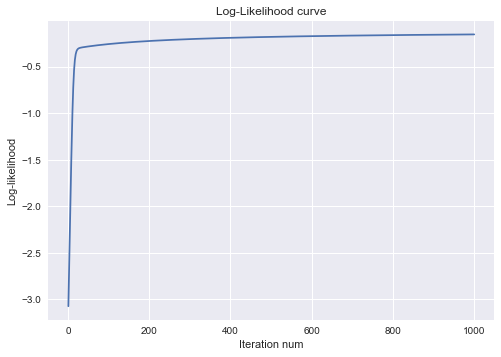

In [23]:
# Plot the loss curve
plt.plot([i+1 for i in range(len(model.likelihoods))], model.likelihoods)
plt.title("Log-Likelihood curve")
plt.xlabel("Iteration num")
plt.ylabel("Log-likelihood")
plt.show()

In [28]:
# ploting random values of x to visulise the line
X_rv = np.arange(5,15)
X_rv

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [30]:
model.weights

array([ 0.01697269, -0.48955935,  1.78761976])

In [29]:
X2_rv = -(model.weights[0]+model.weights[1]*X_rv)/model.weights[2]

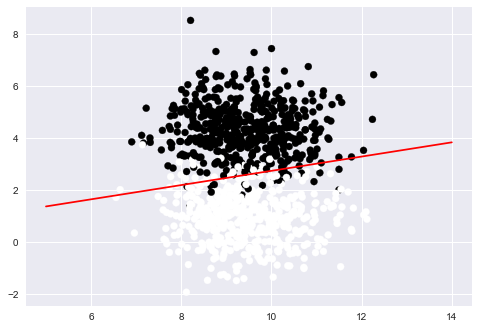

In [32]:
plt.scatter(X[:,1],X[:,2],c=y)
plt.plot(X_rv,X2_rv,c="red")
plt.show()